<a href="https://colab.research.google.com/github/Dennieeeee/Take-Home-Challenges/blob/main/Ads_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<strong>Columns Definition:</strong>

date : all data are aggregated by date

shown : the number of ads shown on a given day all over the web. Impressions are free. That is, companies pay only if a user clicks on the ad, not to show it

clicked : the number of clicks on the ads. This is what companies pay for. By clicking on the ad, the user is brought to the site

converted : the number of conversions on the site coming from ads. To be counted, a conversion has to happen on the same day as the ad click.

avg_cost_per_click : on an average, how much it cost each of those clicks 

total_revenue : how much revenue came from the conversions

ad : we have several different ad groups. This shows which ad group we are considering

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/Dennieeeee/Take-Home-Challenges/main/Data/ad_table.csv')

In [3]:
df.head()

,date,shown,clicked,converted,avg_cost_per_click,total_revenue,ad
0,2015-10-01,65877,2339,43,0.90,641.62,ad_group_1
1,2015-10-02,65100,2498,38,0.94,756.37,ad_group_1
2,2015-10-03,70658,2313,49,0.86,970.90,ad_group_1
3,2015-10-04,69809,2833,51,1.01,907.39,ad_group_1
4,2015-10-05,68186,2696,41,1.00,879.45,ad_group_1


In [4]:
df.describe()

,shown,clicked,converted,avg_cost_per_click,total_revenue
count,2115.000000,2115.000000,2115.000000,2115.000000,2115.000000
mean,68299.844444,3056.077069,126.453901,1.373749,1966.517589
std,48884.821409,3783.579969,233.420826,0.754331,3942.018757
min,0.000000,0.000000,0.000000,0.000000,-200.150000
25%,28030.500000,744.000000,18.000000,0.760000,235.470000
50%,54029.000000,1392.000000,41.000000,1.400000,553.300000
75%,97314.500000,3366.500000,103.000000,1.920000,1611.495000
max,192507.000000,20848.000000,1578.000000,4.190000,39623.710000


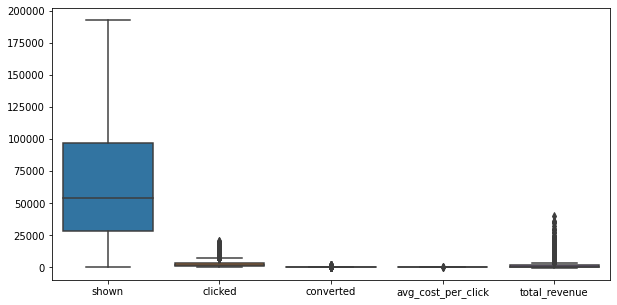

In [5]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df)

In [6]:
df.isnull().sum()

date                  0
shown                 0
clicked               0
converted             0
avg_cost_per_click    0
total_revenue         0
ad                    0
dtype: int64

In [7]:
df_clean = df.copy()

In [8]:
df_clean['date'] = pd.to_datetime(df_clean['date'])

In [9]:
df_clean['Year'] = df_clean['date'].dt.year
df_clean['Month'] = df_clean['date'].dt.month_name()
df_clean['Month_num'] = df_clean['date'].dt.month

In [10]:
df_clean['weekday'] = df_clean['date'].dt.weekday

In [11]:
# lowercase all variables
df_clean.rename(columns=lambda x:x.lower(), inplace=True)

In [12]:
df_clean.head()

,date,shown,clicked,converted,avg_cost_per_click,total_revenue,ad,year,month,month_num,weekday
0,2015-10-01,65877,2339,43,0.90,641.62,ad_group_1,2015,October,10,3
1,2015-10-02,65100,2498,38,0.94,756.37,ad_group_1,2015,October,10,4
2,2015-10-03,70658,2313,49,0.86,970.90,ad_group_1,2015,October,10,5
3,2015-10-04,69809,2833,51,1.01,907.39,ad_group_1,2015,October,10,6
4,2015-10-05,68186,2696,41,1.00,879.45,ad_group_1,2015,October,10,0


In [13]:
df_clean['year'].value_counts()

2015    2115
Name: year, dtype: int64

In [14]:
df_clean['month'].value_counts()

October     1238
November     877
Name: month, dtype: int64

In [15]:
# add a new column: ad_group_number and only keep the number of each ad group
df_clean['ad_group_number'] = df_clean['ad'].apply(lambda x:x[9:])

In [16]:
df_clean['ad'].value_counts()

ad_group_29    53
ad_group_33    53
ad_group_34    53
ad_group_30    53
ad_group_28    53
ad_group_13    53
ad_group_35    53
ad_group_2     53
ad_group_31    53
ad_group_3     53
ad_group_1     53
ad_group_36    53
ad_group_9     53
ad_group_25    53
ad_group_38    53
ad_group_22    53
ad_group_26    53
ad_group_7     53
ad_group_12    53
ad_group_21    53
ad_group_16    53
ad_group_27    53
ad_group_32    53
ad_group_19    53
ad_group_4     53
ad_group_37    53
ad_group_15    53
ad_group_40    53
ad_group_11    53
ad_group_8     53
ad_group_23    53
ad_group_17    53
ad_group_6     53
ad_group_39    53
ad_group_5     53
ad_group_10    52
ad_group_18    52
ad_group_24    52
ad_group_20    52
ad_group_14    52
Name: ad, dtype: int64

# EDA

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


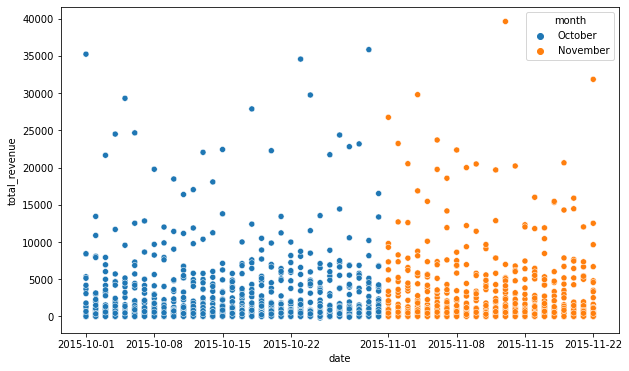

In [17]:
plt.figure(figsize=(10,6))
sns.scatterplot('date', 'total_revenue',data=df_clean, hue='month')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


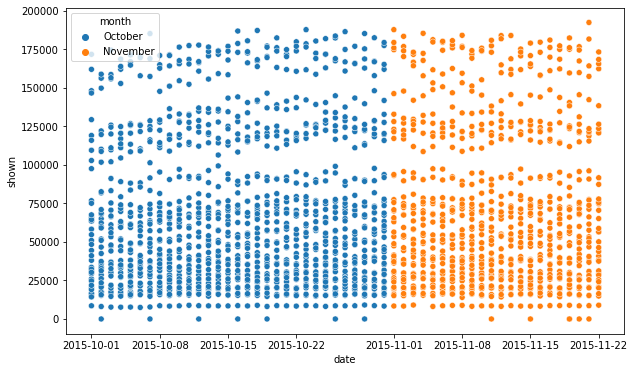

In [18]:
plt.figure(figsize=(10,6))
sns.scatterplot('date', 'shown',data=df_clean, hue='month')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


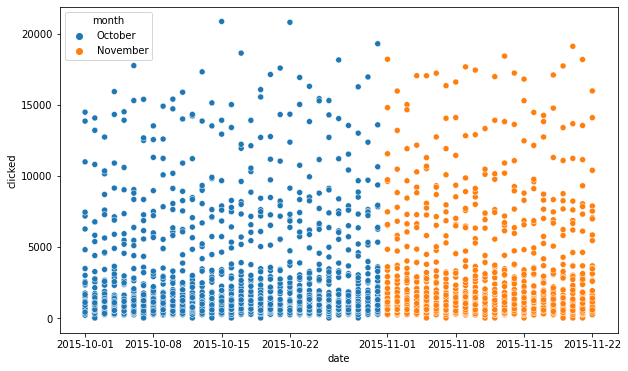

In [19]:
plt.figure(figsize=(10,6))
sns.scatterplot('date', 'clicked',data=df_clean, hue='month')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


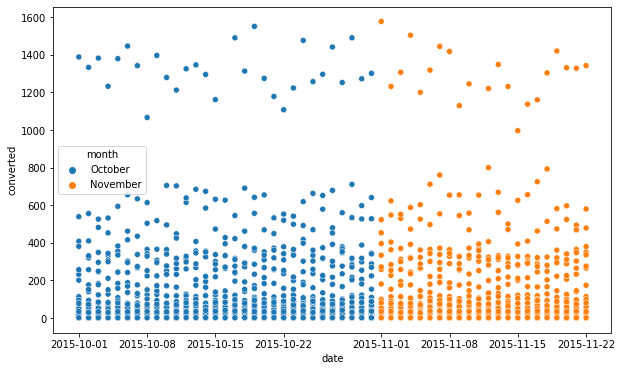

In [20]:
plt.figure(figsize=(10,6))
sns.scatterplot('date', 'converted',data=df_clean, hue='month')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


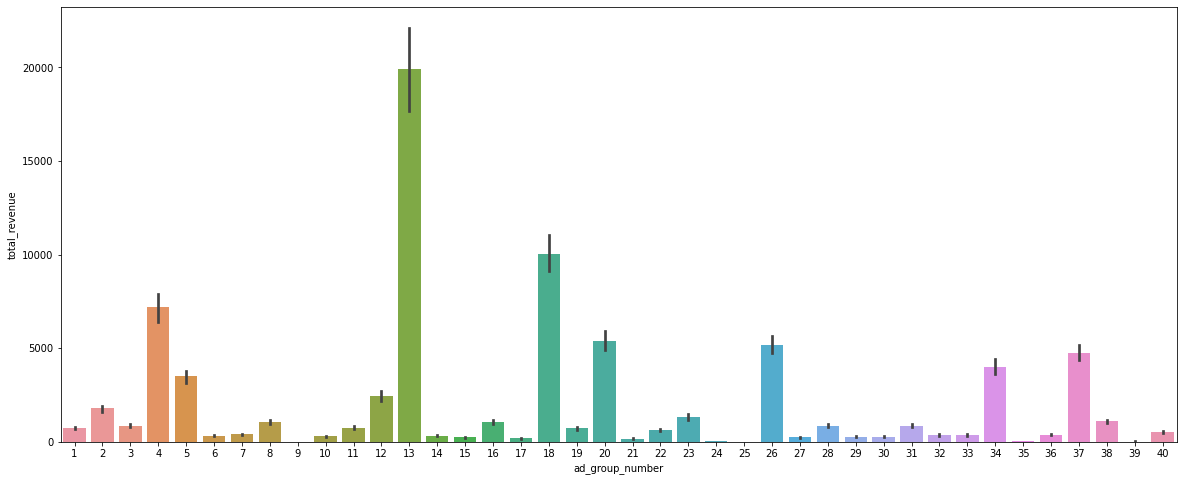

In [21]:
plt.figure(figsize=(20,8))
sns.barplot('ad_group_number', 'total_revenue', data=df_clean)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


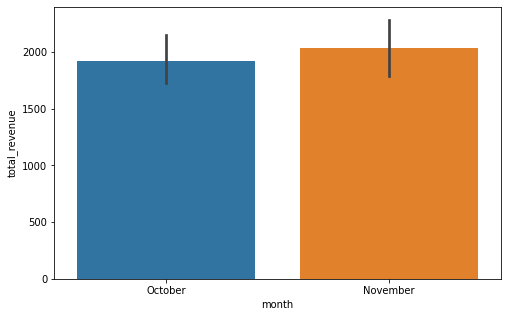

In [22]:
plt.figure(figsize=(8,5))
sns.barplot('month', 'total_revenue', data=df_clean)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


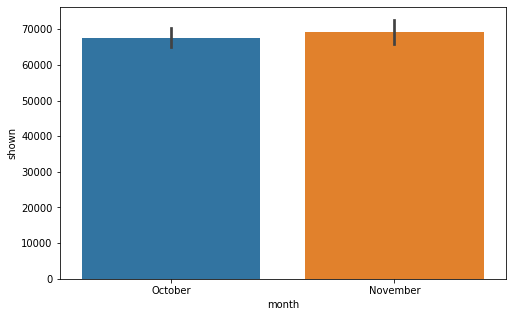

In [23]:
plt.figure(figsize=(8,5))
sns.barplot('month', 'shown', data=df_clean)

In [24]:
df_clean.head(2)

,date,shown,clicked,converted,avg_cost_per_click,total_revenue,ad,year,month,month_num,weekday,ad_group_number
0,2015-10-01,65877,2339,43,0.90,641.62,ad_group_1,2015,October,10,3,1
1,2015-10-02,65100,2498,38,0.94,756.37,ad_group_1,2015,October,10,4,1


# Question 1
If you had to identify the 5 best ad groups, which ones would they be? Which metric did you choose to identify the best ad groups? Why? Explain the pros of your metric as well as the possible cons.

In [25]:
df_clean['profit'] = df_clean['total_revenue'] - df_clean['avg_cost_per_click'] * df_clean['clicked']  

In [26]:
def unit_profit(df):
  profit = df_clean['profit'].sum()
  shown = df_clean['shown'].sum()
  val = profit/shown

  return val

In [27]:
grouped = df_clean.groupby('ad').apply(unit_profit).reset_index()
grouped = grouped.rename(columns={0:'unit_price'})
grouped = grouped.sort_values(by='unit_price', ascending=False)
grouped.head()

,ad,unit_price
0,ad_group_1,-0.054201
1,ad_group_10,-0.054201
22,ad_group_3,-0.054201
23,ad_group_30,-0.054201
24,ad_group_31,-0.054201


# Question 2
For each group, predict how many ads will be shown on Dec, 15 (assume each ad group keeps following its trend).

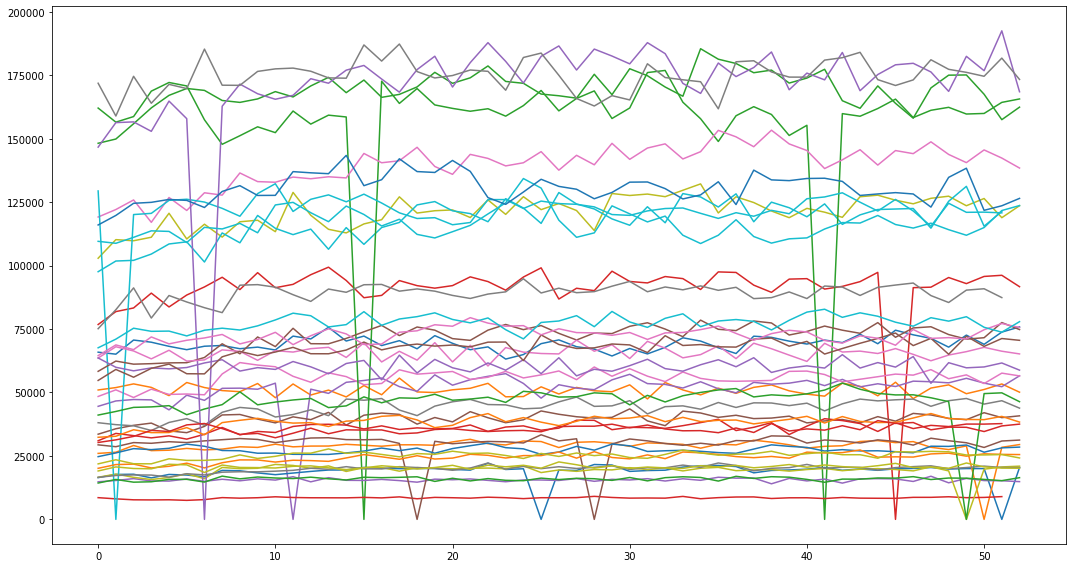

In [28]:
fig, ax = plt.subplots(figsize=(15, 8))
for i in range(1, 41):
    ad_group = 'ad_group_' + str(i)
    vals = df_clean[df_clean['ad'] == ad_group].sort_values(by='date')['shown'].values
    ax.plot(vals, label=ad_group)
# ax.legend()
plt.tight_layout()
plt.show()